CHOOSING AN ESTIMATOR FOR A CLASSIFICATION PROBLEM -- HEART DISEASE

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv("43 - heart-disease.csv")

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
len(heart_disease)

303

using cheat sheet -- `LinearSVC`

In [5]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter = 10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [6]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
 # ENSEMBLE MODEL -- RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf_rf.score(X_test,y_test)

0.8524590163934426

Tidbit :

    1. If you have structured data (in a table), use ensemble methods
    2. If data is not structured, use deep learning or transfer learning methods

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for :
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [8]:
 # ENSEMBLE MODEL -- RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training machine learning model)
clf_rf.fit(X_train,y_train)

# Evaluate the LinearSVC (use the patterns the model has learned)
clf_rf.score(X_test,y_test)

0.8524590163934426

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

There are 2 ways to make predictions:
    1. `predict()`
    2. `predict_proba()`

In [12]:
# Use a trained model to make predictions
# clf_rf.predict(np.array([1,7,8,3,4]))  # -- this doesn't work

C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [14]:
clf_rf.predict(X_test)   #--predicted values

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [16]:
np.array(y_test)  #actual truth values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf_rf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [18]:
clf_rf.score(X_test, y_test)

0.8524590163934426

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Make predictions with `predict_proba()`

In [20]:
# predict_proba() returns probability of a classification label(probability of 0 and 1)
clf_rf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [21]:
clf_rf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [22]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


## 4. Evaluating the model

### 4.1 Evaluating using built-in `score()` method

In [23]:
clf_rf.score(X_test,y_test)

0.8524590163934426

4.2 Evaluating using `scoring` parameter

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(clf_rf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [26]:
cross_val_score(clf_rf, X,y, cv = 5) 

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [27]:
cross_val_score(clf_rf, X,y, cv = 10) 

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [28]:
# np.random.seed(42)
# Single training and test split score
clf_rf_single_score = clf_rf.score(X_test,y_test)
# Take mean of 5 fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv =5))

# Compare the two
clf_rf_single_score, clf_cross_val_score


C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

(0.8524590163934426, 0.7392896174863388)

In [29]:
# Default scoring parameter of classifier = mean accuracy
clf_rf.score(X_test,y_test)

0.8524590163934426

In [30]:
# Scoring parameter set to none by default
cross_val_score(clf,X,y,cv=5,scoring = None)

C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

array([0.81967213, 0.78688525, 0.81967213, 0.76666667, 0.73333333])

### 4.2.1 Classification model evaluation metrics
    1. Accuracy
    2. Area under ROC curve
    3. Confusion matrix
    4. Classification report

**Accuracy**

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf_rf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv =5)

C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

In [32]:
cross_val_score

array([0.49180328, 0.80327869, 0.57377049, 0.66666667, 0.73333333])

In [33]:
np.mean(cross_val_score)

0.6537704918032786

In [34]:
print(f"Heart Disease Classifier Cross-Validation Accuracy: {np.mean(cross_val_score) *100 :.2f} %") 

Heart Disease Classifier Cross-Validation Accuracy: 65.38 %


**Area under the Receiver Operating Curve (AUC/ROC)**

* Area under curve (AUC)
* ROC Curve

ROC curves are a comparision of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth (real value) is 1
* Flase positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* Flase negative = model predicts 0 when truth is 1

In [35]:
np.random.seed(42)


# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training machine learning model)
clf_rf.fit(X_train,y_train)

# Evaluate the LinearSVC (use the patterns the model has learned)
clf_rf.score(X_test,y_test)

0.8524590163934426

In [36]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities -- predict_proba()
y_probs = clf_rf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [37]:
# y_positives
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [38]:
# Calculate tpr, fpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

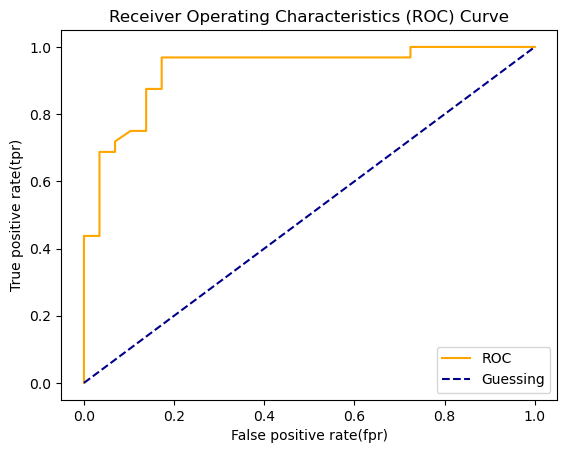

In [39]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) 
    and true positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color = "orange",label="ROC")
    # Plot lines with no predictive power (baseline)
    plt.plot([0,1],[0,1], color = "darkblue",linestyle="--", label = "Guessing")

    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)
    

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

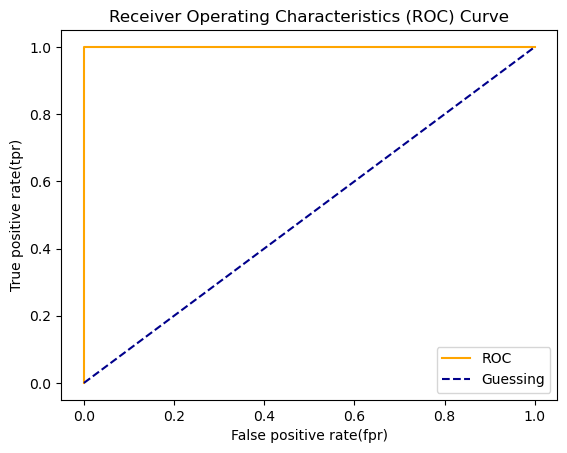

In [41]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [42]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [43]:
from sklearn.metrics import confusion_matrix

y_preds = clf_rf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [44]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])
            

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [45]:
24 + 5 + 4 + 28

61

In [46]:
len(X_test)

61

In [47]:
# Install a conda package from jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https//repo.anaconda.com/pkgs/main/win-64'




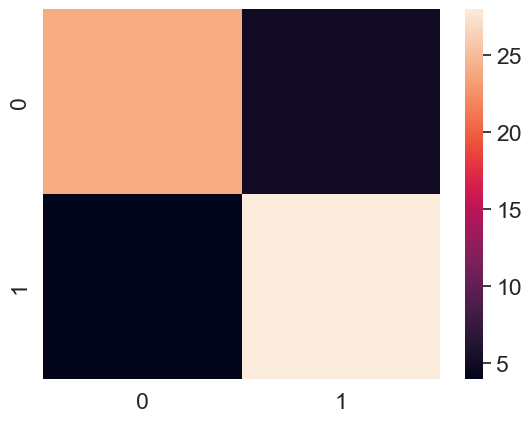

In [48]:
# Visualize using seaborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-learn


In [49]:
import sklearn
sklearn.__version__

'1.3.0'

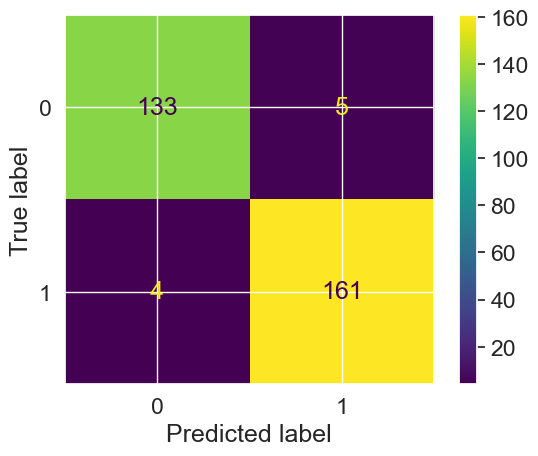

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf_rf, X =X, y = y)

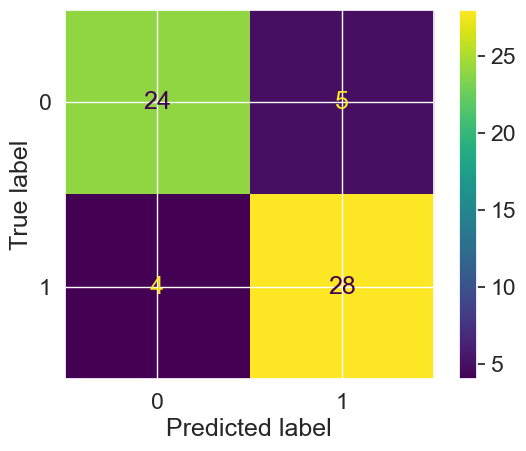

In [51]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                       y_pred = y_preds);

***Classification Report***

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [53]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0 

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.3 Finally using the `scoring` parameter

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target" , axis =1)
y = heart_disease["target"]

clf_rf = RandomForestClassifier(n_estimators =100)


In [55]:
np.random.seed(42)

# Cross-validation accuracy 
cv_acc = cross_val_score(clf_rf,X,y,cv =5,scoring = None)
# if scoring = None, estimator's default scoring evaluation metric is  used( which is accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [56]:
# Cross validation accuracy 
print(f"The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [57]:
np.random.seed(42)
cv_acc = cross_val_score(clf_rf,X,y,cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [58]:
print(f"The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [59]:
# Precision -- indicates the proportion of positive identifications 
np.random.seed(42)
cv_precision = cross_val_score(clf_rf,X,y,cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [60]:
# Cross-validated precision
print(f"The cross-validation precision is : {np.mean(cv_precision)*100:.2f}%")

The cross-validation precision is : 83.30%


In [61]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf_rf,X,y,cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [62]:
# Cross-validated precision
print(f"The cross-validation recall is : {np.mean(cv_recall)*100:.2f}%")

The cross-validation recall is : 85.45%



### 4.3 Using different evaluation metrics as Scikit-learn functions¶
The 3rd way to evaluate scikit-learn machin learning models/estimators is to using the sklearn.metrics module

In [63]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [64]:
# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
# print(f"Accuracy: {accuracy_score(y_test, clf_rf.predict(X_test))*100:.2f}%")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


## 5. Improving a Model

### 5.1 Tuning hyperparameters by hand

Make 3 sets -- training, validation and test 

In [65]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Try and adjust:

    * max_depth
    * max_features
    * min_samples_leaf
    * min_samples_split
    * n_estimators

In [82]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comprarision on y_true labels vs y_pred labels on a classification model
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
               "precision": round(precision,2),
               "recall": round(recall,2),
               "f1": round(f1,2)}
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision*100:.2f}%")
    print(f"Recall :{recall*100:.2f}%")
    print(f"F1 score:{f1*100:.2f}%")

    return metric_dict



In [67]:
np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac =1)

# split data into x & y
X_sh = heart_disease_shuffled.drop("target",axis =1)
y_sh = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X_sh[:train_split], y_sh[:train_split]
X_valid, y_valid = X_sh[train_split:valid_split], y_sh[train_split:valid_split]
X_test, y_test = X_sh[valid_split:], y_sh[:valid_split]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [68]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf_rf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:82.22%
Precision:81.48%
Recall :88.00%
F1 score:84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [69]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators =100)
clf2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds2 = clf2.predict(X_valid)

# Evaluate the 2nd classifier
clf2_metrics = evaluate_preds(y_valid,y_preds2)

Acc:82.22%
Precision:84.00%
Recall :84.00%
F1 score:84.00%


In [70]:
np.random.seed(42)

### 5.2 Hyperparameter tuning with RamdomizedSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# create dictionary with hyperparameters we like to adjust as keys and different values 
grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features": ["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split data into X and Y
X_sh = heart_disease_shuffled.drop("target",axis=1)
y_sh = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_sh,y_sh,test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator= clf,
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv=5,
                            verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   5.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

In [80]:
# Get best parameters value combinations
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [83]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy:81.97%
Precision:77.42%
Recall :85.71%
F1 score:81.36%


### 5.3 Hyperparameter tuning using GridSearchCV

In [84]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [87]:
# Reduce search space for hyperparameters
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [88]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split data into X and Y
X_sh = heart_disease_shuffled.drop("target",axis=1)
y_sh = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_sh,y_sh,test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator= clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\aasth\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

In [90]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [91]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Accuracy:81.97%
Precision:77.42%
Recall :85.71%
F1 score:81.36%


Comparing different models metrics

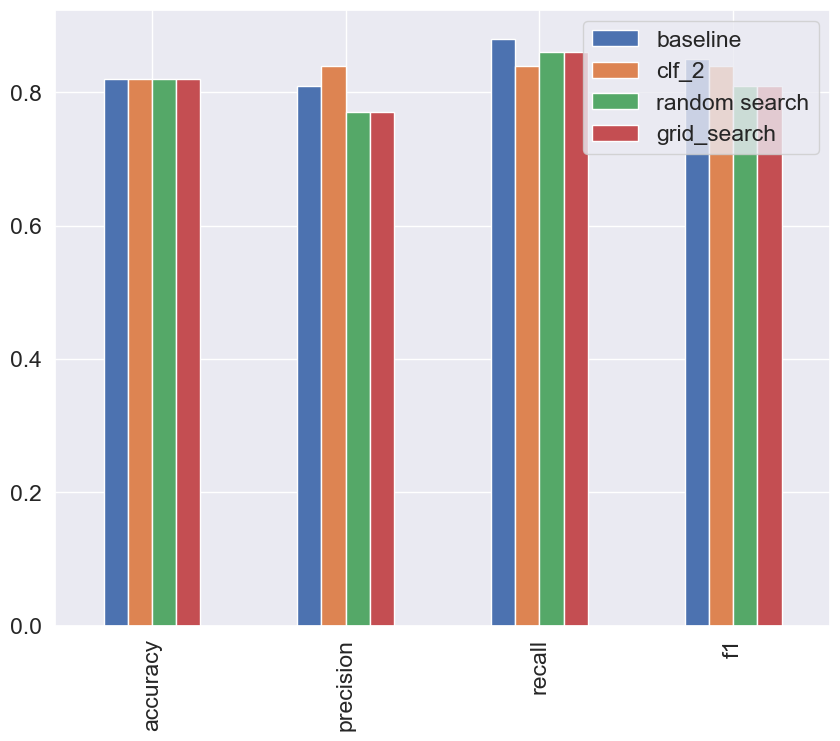

In [96]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf2_metrics,
                                "random search":rs_metrics,
                                "grid_search":gs_metrics})

compare_metrics.plot.bar(figsize = (10, 8));

### 6. Saving and loading trained machine learning models

    Two ways to save and load machine learning models:
        1. With Python's `pickle` module
        2. With the `joblib` module

**Pickle**

In [97]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_randomForestModel_1.pkl", "wb"))

In [98]:
# Load a saved model

loaded_pickle_model = pickle.load(open("gs_randomForestModel_1.pkl", "rb"))

In [99]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy:81.97%
Precision:77.42%
Recall :85.71%
F1 score:81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}